In [28]:
#%% file import pre procesing
import pandas as pd
import numpy as np



#plots
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats

In [29]:
# read in pup merged file 
le16_df = pd.read_excel('le16_p14_calls.xlsx')
le15_df = pd.read_excel('le15_p14_calls.xlsx')

pup_df = pd.concat([le16_df,le15_df])
pup_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat
0,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,1,Usv,True,0.624447,15.606167,15.625438,0.019271,36.476648,36.243132,37.644231,1.401099,0.590755,23.427024,1.203332,-97.472034,0.247498,37.644231,WT,581
1,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,2,Usv,True,0.536672,49.924696,49.967026,0.042329,68.803502,65.661479,70.622568,4.961089,1.823892,63.342752,1.909888,-104.364848,0.195837,70.622568,WT,581
2,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,3,Usv,True,0.654665,51.288950,51.309374,0.020424,58.434633,57.264908,60.384174,3.119266,1.245267,38.633587,1.571769,-102.419875,0.188441,59.604358,WT,581
3,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,4,Short,True,0.562621,92.325944,92.331173,0.005229,66.386719,62.070312,67.382812,5.312500,2.005974,814.827346,1.650997,-76.692259,0.392286,66.718750,WT,581
4,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,5,Usv,True,0.811888,113.121267,113.131814,0.010547,67.423780,64.573171,69.756098,5.182927,1.726071,351.546927,1.621528,-81.221601,0.565201,67.164634,WT,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,33,Usv,True,0.576086,275.119146,275.140110,0.020965,36.559343,34.842172,37.847222,3.005051,0.901588,76.877677,1.415094,-105.524428,0.174650,37.847222,KO,564
801,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,34,Flat,True,0.696477,286.629046,287.435776,0.806729,30.680015,28.919321,40.629301,11.709980,3.715750,-14.024916,1.041005,-78.307884,0.459822,36.159029,KO,564
802,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,35,Usv,True,0.609666,293.973794,293.996894,0.023100,61.535904,59.727394,63.344415,3.617021,1.041742,131.303308,1.096388,-89.717212,0.348353,60.631649,KO,564
803,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,36,Usv,True,0.645543,294.009152,294.103881,0.094729,41.406840,36.595519,45.576651,8.981132,2.749973,-90.314400,2.051698,-77.609364,0.683792,36.595519,KO,564


In [30]:
# if row contains iso1 set iso 1 in timepoint column'


pup_df['Timepoint'] = pup_df["File"].str.extract("(iso1|iso2)")[0] #grab isolation from filename
#pup_df['Rat'] = pup_df['File'].str.extract(r'Detections\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
pup_df['Timepoint'].unique()

array(['iso1', 'iso2'], dtype=object)

# Call Number comparison

In [31]:
# call number compared
pup_df_g = pup_df.groupby(['Genotype','Timepoint']).count() # counts number of rows(calls) per rat
pup_df_g = pup_df_g.reset_index() # adds indices back to columns for graphing


In [32]:
pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()
pup_df_rat_avg = pup_df_rat_avg.reset_index()
pup_df_rat_avg

C:\Users\User\AppData\Local\Temp\ipykernel_21000\4212151507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()


,Rat,Genotype,Timepoint,ID,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,563,WT,iso1,1.0,1.0,0.508323,279.072388,279.096653,0.024265,59.175725,58.713768,59.329710,0.615942,0.302795,-14.598468,1.090612,-102.947530,0.192077,59.329710
1,563,WT,iso2,8.0,1.0,0.573341,166.993888,167.017292,0.023404,45.877399,43.689962,47.886155,4.196193,1.589936,17.685833,1.680393,-101.899697,0.209626,45.614666
2,564,KO,iso1,19.0,1.0,0.660080,185.999110,186.147815,0.148706,47.930920,46.149212,51.200925,5.051713,1.612387,56.861205,1.419343,-90.188211,0.398852,48.020761
3,564,KO,iso2,113.5,1.0,0.690919,161.343228,161.486929,0.143701,46.519390,44.292469,51.423912,7.131443,2.083185,72.272734,1.386201,-82.010226,0.519669,47.278845
4,565,KO,iso1,38.0,1.0,0.700693,201.000126,201.248629,0.248503,34.813089,33.142239,38.755645,5.613406,1.658561,-9.632776,1.414801,-80.294062,0.552930,35.637371
5,565,KO,iso2,58.0,1.0,0.706252,155.676540,155.865265,0.188725,39.607602,37.598860,42.940724,5.341864,1.612311,-16.731026,1.544388,-75.493442,0.652493,39.702381
6,566,KO,iso1,101.5,1.0,0.718343,165.809114,166.073957,0.264843,32.357545,30.578744,40.441734,9.862989,3.179451,-4.178295,1.408983,-77.690114,0.569736,33.319143
7,566,KO,iso2,67.5,1.0,0.681368,150.436254,150.707267,0.271012,33.211009,31.968461,37.769867,5.801406,1.627126,-15.850734,1.146518,-75.571001,0.598107,34.550255
8,580,WT,iso1,23.0,1.0,0.665306,120.476570,120.711962,0.235392,43.219309,39.345267,46.773493,7.428226,2.346143,-1.538615,1.647978,-85.963858,0.428329,44.062454
9,580,WT,iso2,111.5,1.0,0.716402,144.579107,144.903659,0.324551,35.087067,33.494935,39.267552,5.772617,1.665371,-5.670655,1.207709,-70.605440,0.664483,35.349244


### Call number graphs

Text(0.5, 1.0, 'Average Call Number p3')

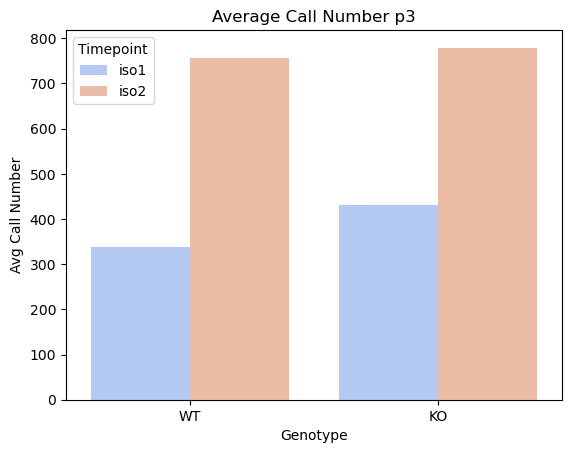

In [33]:
# graph male genotype differences in average call number

sns.barplot(data = pup_df_g,x = 'Genotype',y='File',hue='Timepoint', hue_order = ['iso1', 'iso2'],order = ['WT','KO'],palette='coolwarm')
plt.ylabel('Avg Call Number')
plt.xlabel('Genotype')
plt.title('Average Call Number p3')   


In [34]:
# graph male genotype differences in call number over time
first_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 0) & (pup_df['Begin Time (s)'] <= 60)] #get indexes from time range
pup_df.loc[first_min_ind, 'Minute'] = 1 # add label for graphing to indicate timepoint

sec_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 61) & (pup_df['Begin Time (s)'] <= 120)]
pup_df.loc[sec_min_ind, 'Minute'] = 2

thrd_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 121) & (pup_df['Begin Time (s)'] <= 180)]
pup_df.loc[thrd_min_ind, 'Minute'] = 3

four_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 181) & (pup_df['Begin Time (s)'] <= 300)]
pup_df.loc[four_min_ind, 'Minute'] = 4

pup_df_min_g = pup_df.groupby(['Genotype','Timepoint','Minute']).count() # count number of calls per minute
pup_df_min_g = pup_df_min_g.reset_index() # adds indices back to columns for graphing
pup_df_min_g


,Genotype,Timepoint,Minute,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),...,Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Rat
0,KO,iso1,1.0,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
1,KO,iso1,2.0,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
2,KO,iso1,3.0,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
3,KO,iso1,4.0,267,267,267,267,267,267,267,...,267,267,267,267,267,267,267,267,267,267
4,KO,iso2,1.0,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,KO,iso2,2.0,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
6,KO,iso2,3.0,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
7,KO,iso2,4.0,522,522,522,522,522,522,522,...,522,522,522,522,522,522,522,522,522,522
8,WT,iso1,1.0,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
9,WT,iso1,2.0,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72


Text(0.5, 1.0, 'Avg Call per Minute Male')

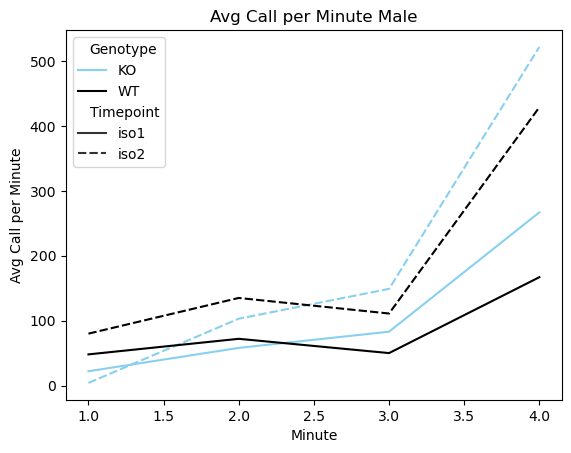

In [35]:
# cont
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=pup_df_min_g,x='Minute',y='ID',hue='Genotype',style='Timepoint',hue_order=['KO','WT'])
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute Male') 

Text(0.5, 1.0, 'Avg Call per Minute 1st Isolation')

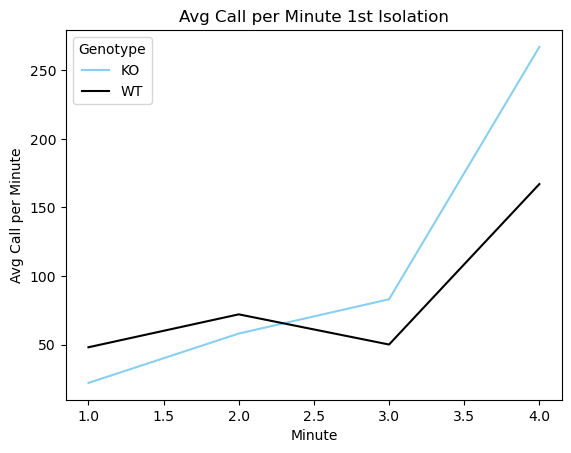

In [36]:
# graph just pre-mom
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso1']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 1st Isolation') 

Text(0.5, 1.0, 'Avg Call per Minute 2nd Isolation')

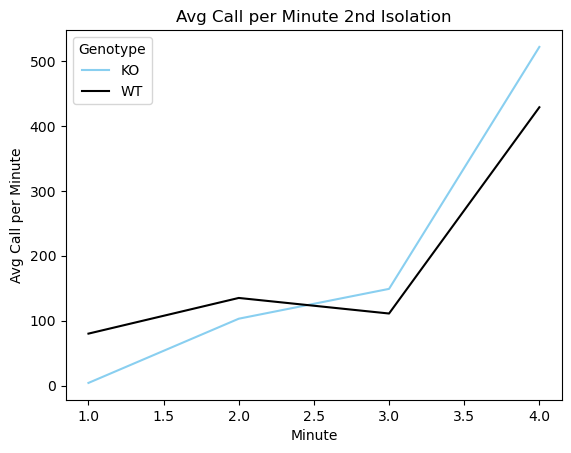

In [37]:
# graph just post-mom
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso2']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 2nd Isolation') 

# Duration Comparison

Text(0.5, 1.0, 'Avg Duration')

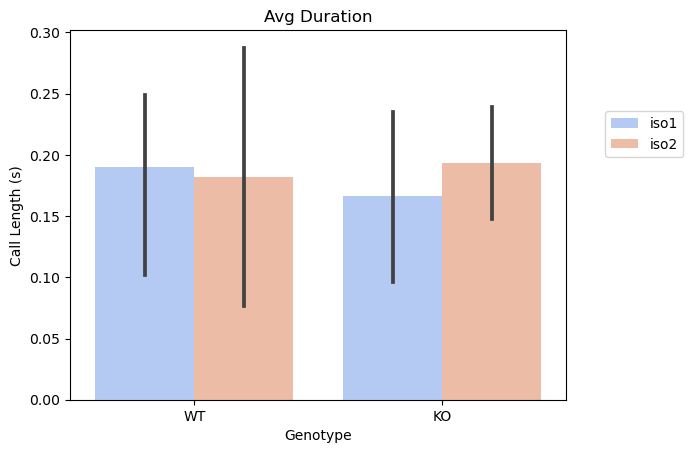

In [38]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Call Length (s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Duration') 

Text(0.5, 1.0, 'Avg Duration per Minute')

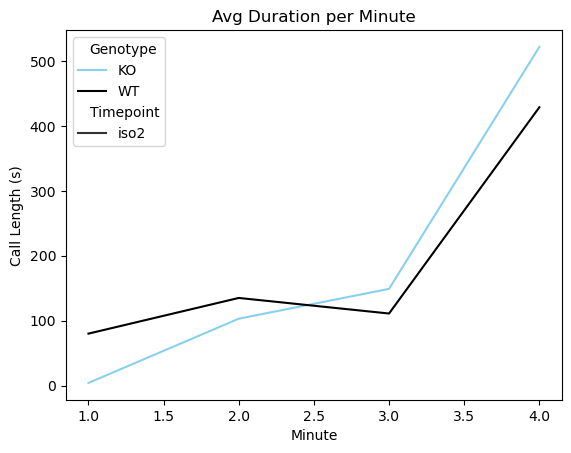

In [39]:
# duration over time both
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Call Length (s)',hue='Genotype',style='Timepoint')
plt.title('Avg Duration per Minute') 

# Principal Freq

In [40]:
pup_df
test = pup_df.reset_index()
test

,index,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),...,Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat,Timepoint,Minute
0,0,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,1,Usv,True,0.624447,15.606167,15.625438,0.019271,36.476648,...,0.590755,23.427024,1.203332,-97.472034,0.247498,37.644231,WT,581,iso1,4.0
1,1,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,2,Usv,True,0.536672,49.924696,49.967026,0.042329,68.803502,...,1.823892,63.342752,1.909888,-104.364848,0.195837,70.622568,WT,581,iso1,1.0
2,2,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,3,Usv,True,0.654665,51.288950,51.309374,0.020424,58.434633,...,1.245267,38.633587,1.571769,-102.419875,0.188441,59.604358,WT,581,iso1,1.0
3,3,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,4,Short,True,0.562621,92.325944,92.331173,0.005229,66.386719,...,2.005974,814.827346,1.650997,-76.692259,0.392286,66.718750,WT,581,iso1,2.0
4,4,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,5,Usv,True,0.811888,113.121267,113.131814,0.010547,67.423780,...,1.726071,351.546927,1.621528,-81.221601,0.565201,67.164634,WT,581,iso1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,800,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,33,Usv,True,0.576086,275.119146,275.140110,0.020965,36.559343,...,0.901588,76.877677,1.415094,-105.524428,0.174650,37.847222,KO,564,iso1,4.0
2299,801,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,34,Flat,True,0.696477,286.629046,287.435776,0.806729,30.680015,...,3.715750,-14.024916,1.041005,-78.307884,0.459822,36.159029,KO,564,iso1,4.0
2300,802,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,35,Usv,True,0.609666,293.973794,293.996894,0.023100,61.535904,...,1.041742,131.303308,1.096388,-89.717212,0.348353,60.631649,KO,564,iso1,4.0
2301,803,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,36,Usv,True,0.645543,294.009152,294.103881,0.094729,41.406840,...,2.749973,-90.314400,2.051698,-77.609364,0.683792,36.595519,KO,564,iso1,4.0


Text(0.5, 1.0, 'Avg Principal Frequency')

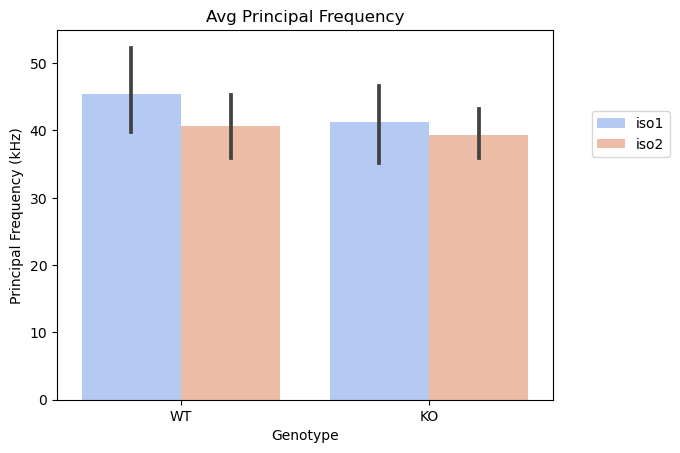

In [41]:
# both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Principal Frequency (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Principal Frequency') 

# Slope Comparison

Text(0.5, 1.0, 'Avg Slope')

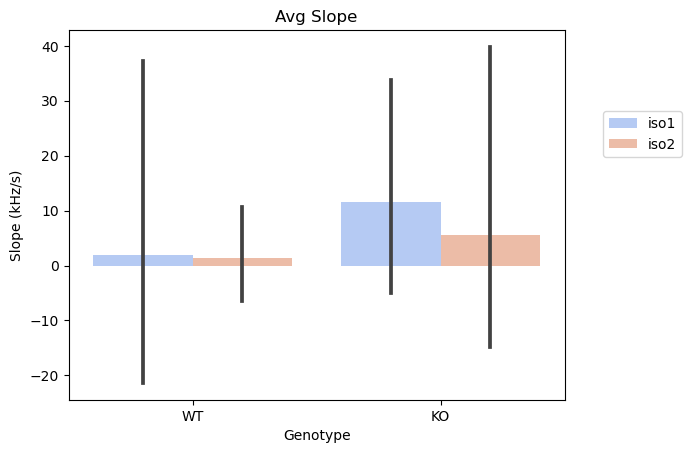

In [42]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Slope (kHz/s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Slope') 


Text(0.5, 1.0, 'Avg Slope per Minute')

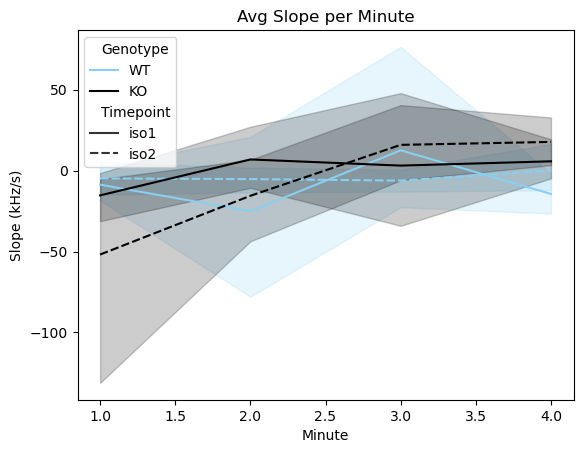

In [43]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Slope (kHz/s)',hue='Genotype',style='Timepoint')
plt.title('Avg Slope per Minute') 

# Delta Frequency 


Text(0.5, 1.0, 'Avg Delta Frequency')

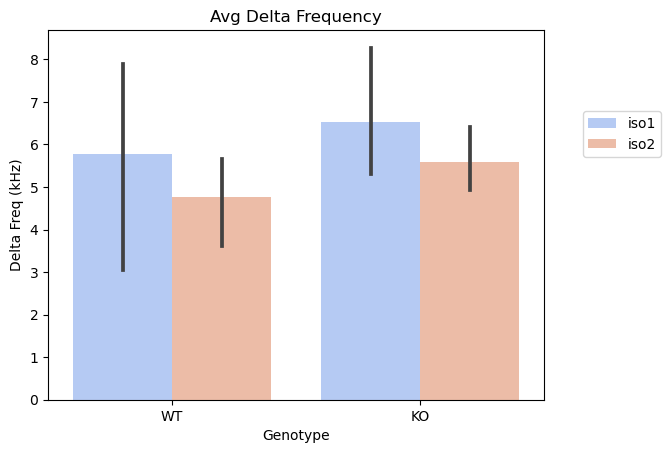

In [44]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Delta Freq (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Delta Frequency') 


Text(0.5, 1.0, 'Avg Delta Frequency per Minute')

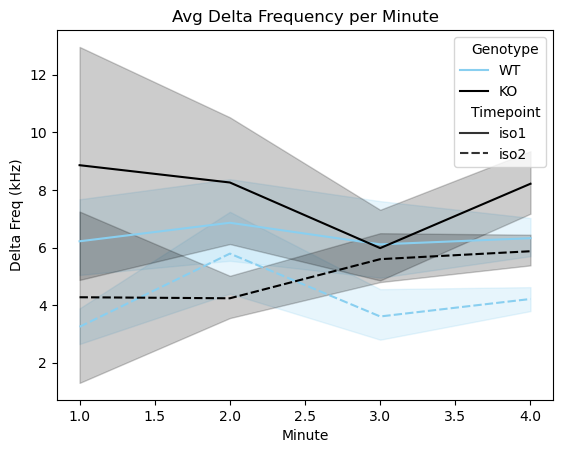

In [45]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Delta Freq (kHz)',hue='Genotype',style='Timepoint')
plt.title('Avg Delta Frequency per Minute') 

# Sinusoity

Text(0.5, 1.0, 'Avg Sinuosity Frequency')

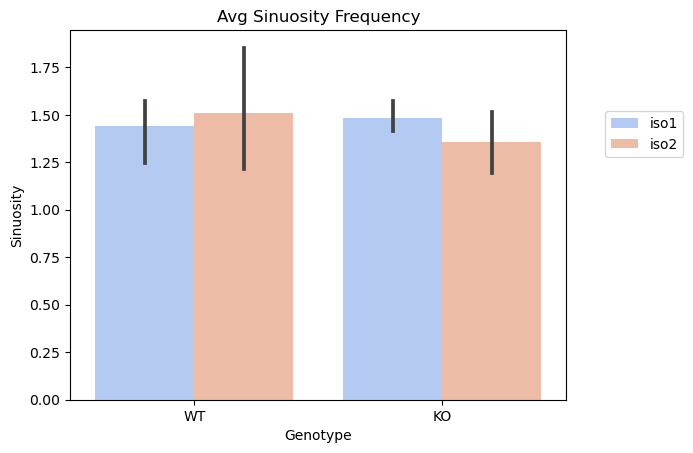

In [46]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Sinuosity',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Sinuosity Frequency')

Text(0.5, 1.0, 'Avg Sinuosity per Minute')

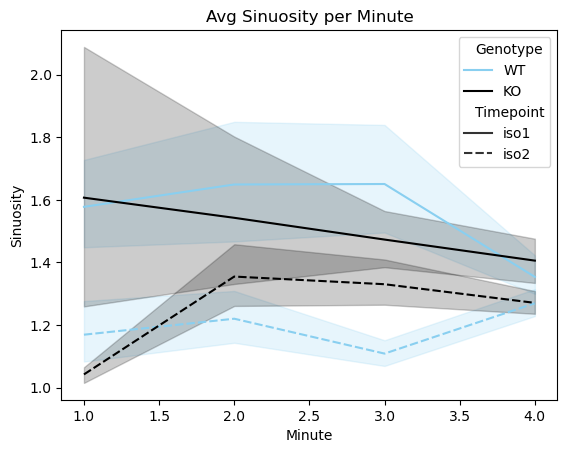

In [19]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Sinuosity',hue='Genotype',style='Timepoint')
plt.title('Avg Sinuosity per Minute') 

# Mean Power


Text(0.5, 1.0, 'Avg Mean Power (dB/Hz)')

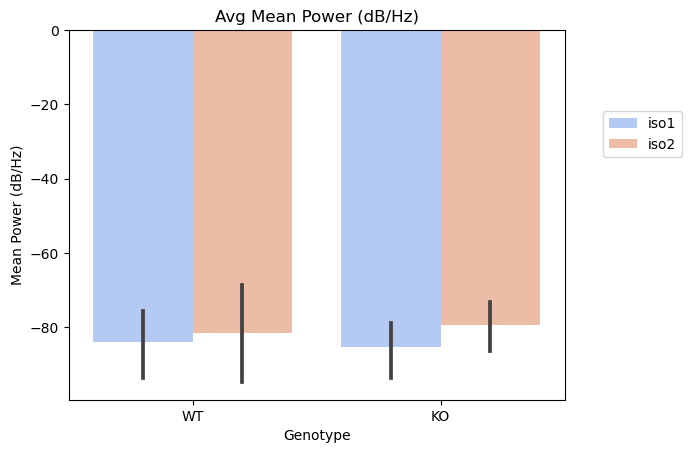

In [47]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Mean Power (dB/Hz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Mean Power (dB/Hz)')

Text(0.5, 1.0, 'Avg Mean Power per Minute')

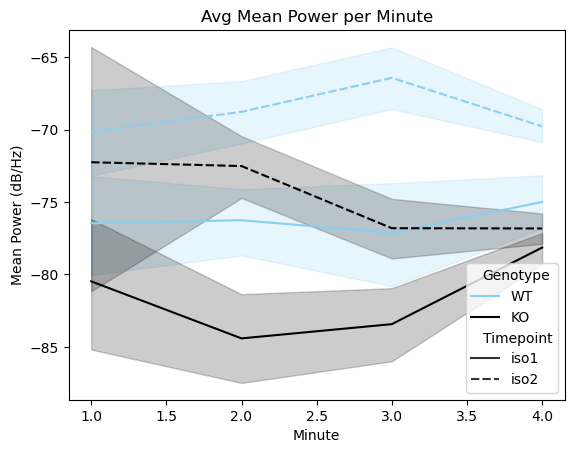

In [48]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Mean Power (dB/Hz)',hue='Genotype',style='Timepoint')
plt.title('Avg Mean Power per Minute') 

# Tonality

Text(0.5, 1.0, 'Avg Tonality')

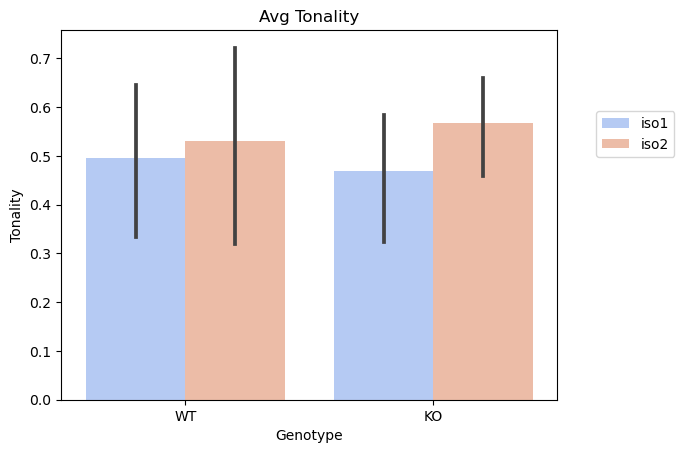

In [49]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Tonality',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Tonality')

Text(0.5, 1.0, 'Avg Tonality per Minute')

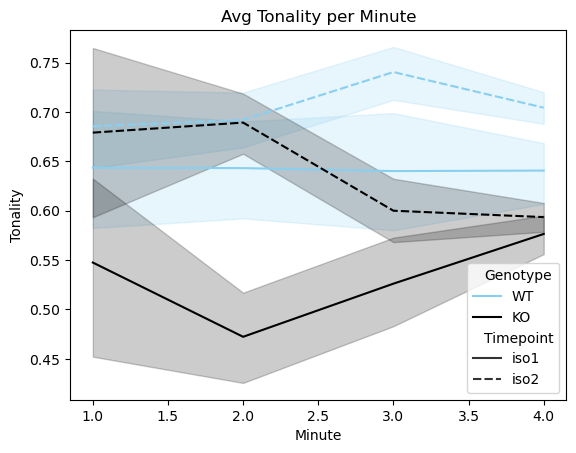

In [50]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Tonality',hue='Genotype',style='Timepoint')
plt.title('Avg Tonality per Minute') 

# Call Type Comparison

In [24]:
# pie chart between wt and het
KO_flat_df = pup_df.loc[pup_df['Genotype'] == 'KO']
wt_flat_df = pup_df.loc[pup_df['Genotype'] == 'WT']
wt_flat_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),...,Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Timepoint,Minute
0,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,1,Usv,True,0.624447,15.606167,15.625438,0.019271,36.476648,36.243132,...,1.401099,0.590755,23.427024,1.203332,-97.472034,0.247498,37.644231,WT,iso1,4.0
1,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,2,Usv,True,0.536672,49.924696,49.967026,0.042329,68.803502,65.661479,...,4.961089,1.823892,63.342752,1.909888,-104.364848,0.195837,70.622568,WT,iso1,1.0
2,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,3,Usv,True,0.654665,51.288950,51.309374,0.020424,58.434633,57.264908,...,3.119266,1.245267,38.633587,1.571769,-102.419875,0.188441,59.604358,WT,iso1,1.0
3,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,4,Short,True,0.562621,92.325944,92.331173,0.005229,66.386719,62.070312,...,5.312500,2.005974,814.827346,1.650997,-76.692259,0.392286,66.718750,WT,iso1,2.0
4,D:\Rat Pup call analysis\litter le 16 fmr1\p14...,5,Usv,True,0.811888,113.121267,113.131814,0.010547,67.423780,64.573171,...,5.182927,1.726071,351.546927,1.621528,-81.221601,0.565201,67.164634,WT,iso1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,11,Usv,True,0.529241,261.779617,261.796605,0.016988,40.937500,38.715278,...,3.888889,1.360828,22.190894,1.320748,-105.384192,0.217112,38.715278,WT,iso2,4.0
12,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,12,Usv,True,0.514642,282.586113,282.631513,0.045400,62.243943,58.873899,...,7.488987,2.121984,-27.870069,3.051217,-102.335208,0.205248,63.741740,WT,iso2,4.0
13,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,13,Usv,True,0.535620,289.797875,289.837580,0.039706,72.136454,69.088645,...,4.402390,2.040321,42.990699,1.824943,-104.617225,0.180449,72.136454,WT,iso2,4.0
14,D:\Rat Pup call analysis\litter le15 fmr1\p14\...,14,Short,True,0.543452,296.732874,296.758404,0.025529,55.554435,53.595910,...,3.133641,1.481246,-128.337673,1.106279,-103.434283,0.219793,55.554435,WT,iso2,4.0


<Axes: >

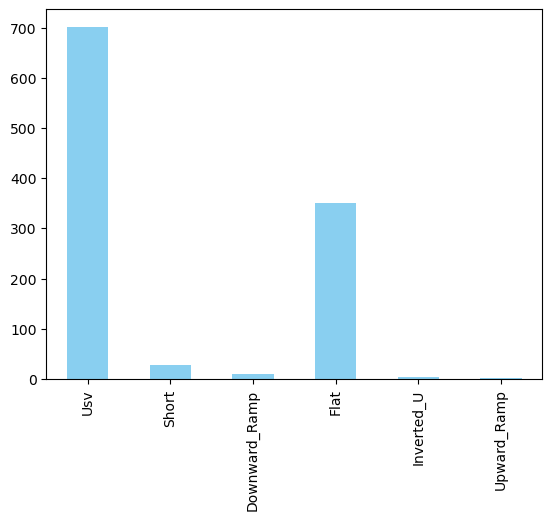

In [51]:
wt_flat_df['Label'].value_counts(sort=False).plot.bar()


<Axes: >

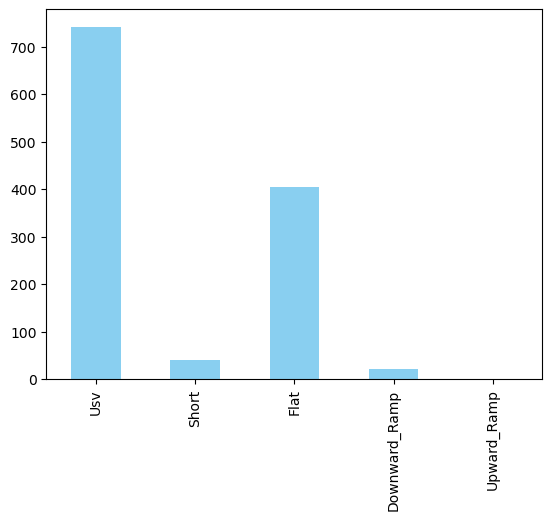

In [52]:
KO_flat_df['Label'].value_counts(sort=False).plot.bar()
